In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, classification_report
import warnings
warnings.filterwarnings('ignore')

In [7]:
import pandas as pd

df = pd.read_csv('/kaggle/input/water-quality-prediction/water_potability.csv')
df.head()

ph    Hardness        Solids  Chloramines     Sulfate  Conductivity  \
0       NaN  204.890455  20791.318981     7.300212  368.516441    564.308654   
1  3.716080  129.422921  18630.057858     6.635246         NaN    592.885359   
2  8.099124  224.236259  19909.541732     9.275884         NaN    418.606213   
3  8.316766  214.373394  22018.417441     8.059332  356.886136    363.266516   
4  9.092223  181.101509  17978.986339     6.546600  310.135738    398.410813   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       10.379783        86.990970   2.963135           0  
1       15.180013        56.329076   4.500656           0  
2       16.868637        66.420093   3.055934           0  
3       18.436524       100.341674   4.628771           0  
4       11.558279        31.997993   4.075075           0

In [9]:
df.shape

(3276, 10)

In [10]:
df.size

32760

In [11]:
df.describe()

ph     Hardness        Solids  Chloramines      Sulfate  \
count  2785.000000  3276.000000   3276.000000  3276.000000  2495.000000   
mean      7.080795   196.369496  22014.092526     7.122277   333.775777   
std       1.594320    32.879761   8768.570828     1.583085    41.416840   
min       0.000000    47.432000    320.942611     0.352000   129.000000   
25%       6.093092   176.850538  15666.690297     6.127421   307.699498   
50%       7.036752   196.967627  20927.833607     7.130299   333.073546   
75%       8.062066   216.667456  27332.762127     8.114887   359.950170   
max      14.000000   323.124000  61227.196008    13.127000   481.030642   

       Conductivity  Organic_carbon  Trihalomethanes    Turbidity   Potability  
count   3276.000000     3276.000000      3114.000000  3276.000000  3276.000000  
mean     426.205111       14.284970        66.396293     3.966786     0.390110  
std       80.824064        3.308162        16.175008     0.780382     0.487849  
min      181.483754        2.200000         0.738000     1.450000     0.000000  
25%      365.734414       12.065801        55.844536     3.439711     0.000000  
50%      421.884968       14.218338        66.622485     3.955028     0.000000  
75%      481.792304       16.557652        77.337473     4.500320     1.000000  
max      753.342620       28.300000       124.000000     6.739000     1.000000

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [13]:
# Null Values.
df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [41]:
# Fill missing values with the mean of each group based on 'Potability'
df['ph'] = df['ph'].fillna(df.groupby('Potability')['ph'].transform('mean'))
df['Sulfate'] = df['Sulfate'].fillna(df.groupby('Potability')['Sulfate'].transform('mean'))
df['Trihalomethanes'] = df['Trihalomethanes'].fillna(df.groupby('Potability')['Trihalomethanes'].transform('mean'))


In [20]:
df.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

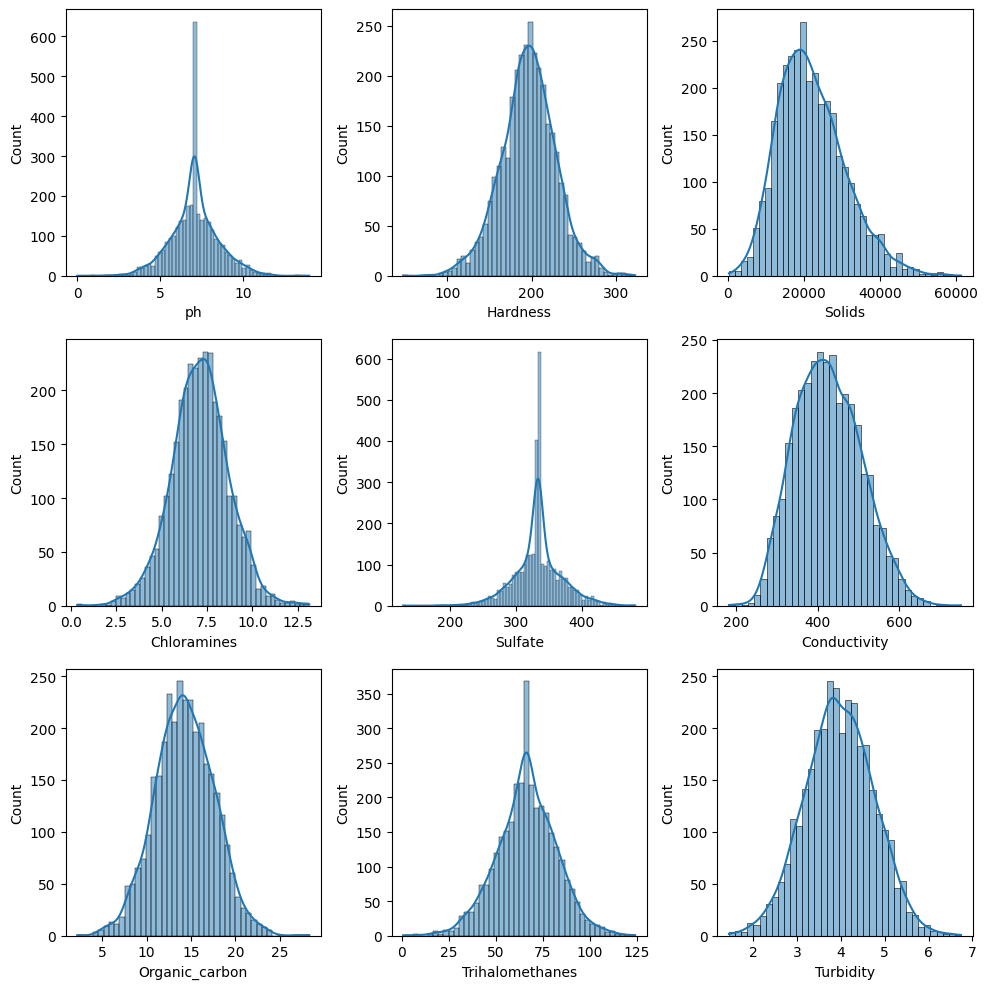

In [ ]:
plt.figure(figsize=(10,10))
plotnumber=1
for column in df.columns[:9]:
    ax=plt.subplot(3,3,plotnumber)
    sns.histplot(df[column],kde=True)
    plotnumber+=1
plt.tight_layout()

<Axes: xlabel='Potability', ylabel='count'>

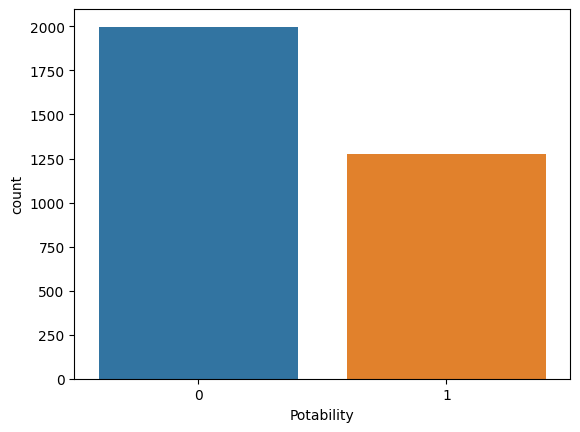

In [22]:
sns.countplot(x='Potability', data=df)

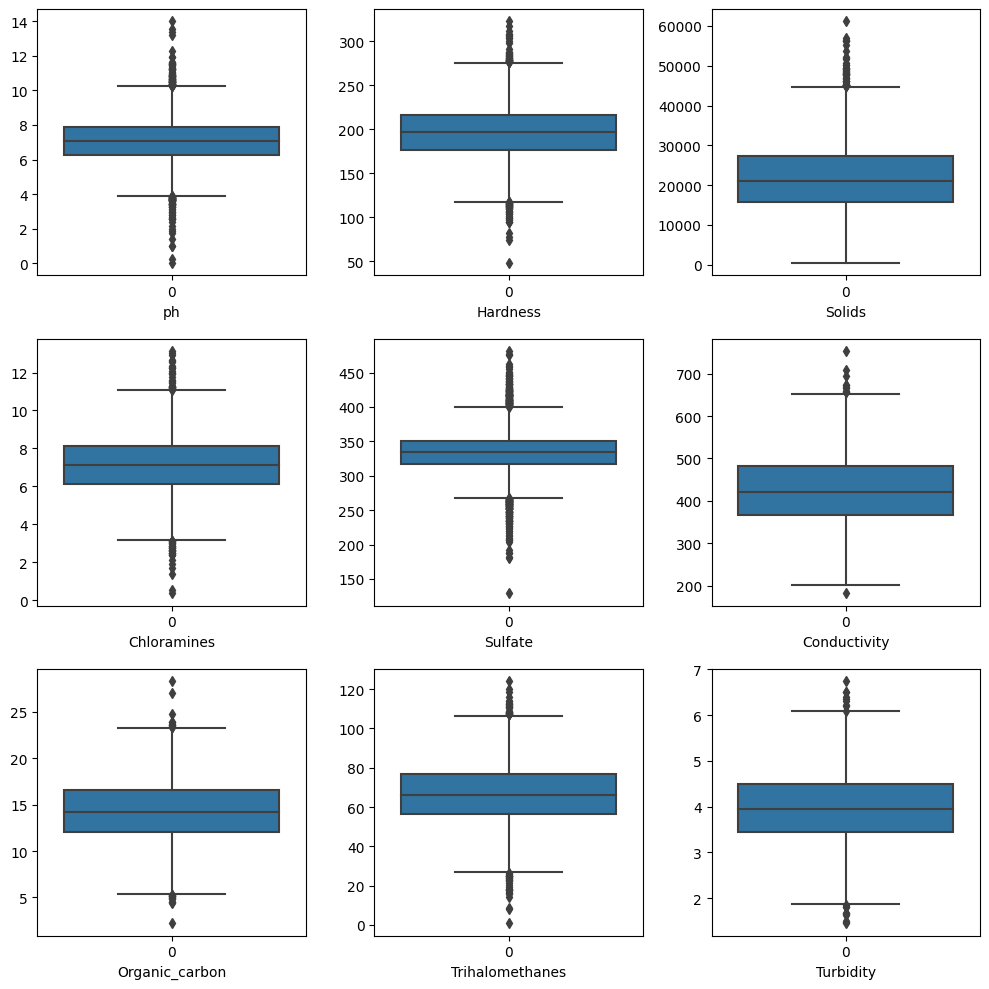

In [23]:
# Boxplot
plt.figure(figsize=(10,10))
plotnumber=1
for column in df.columns[:9]:
    ax=plt.subplot(3,3,plotnumber)
    sns.boxplot(df[column])
    plt.xlabel(column)
    plotnumber+=1
plt.tight_layout()

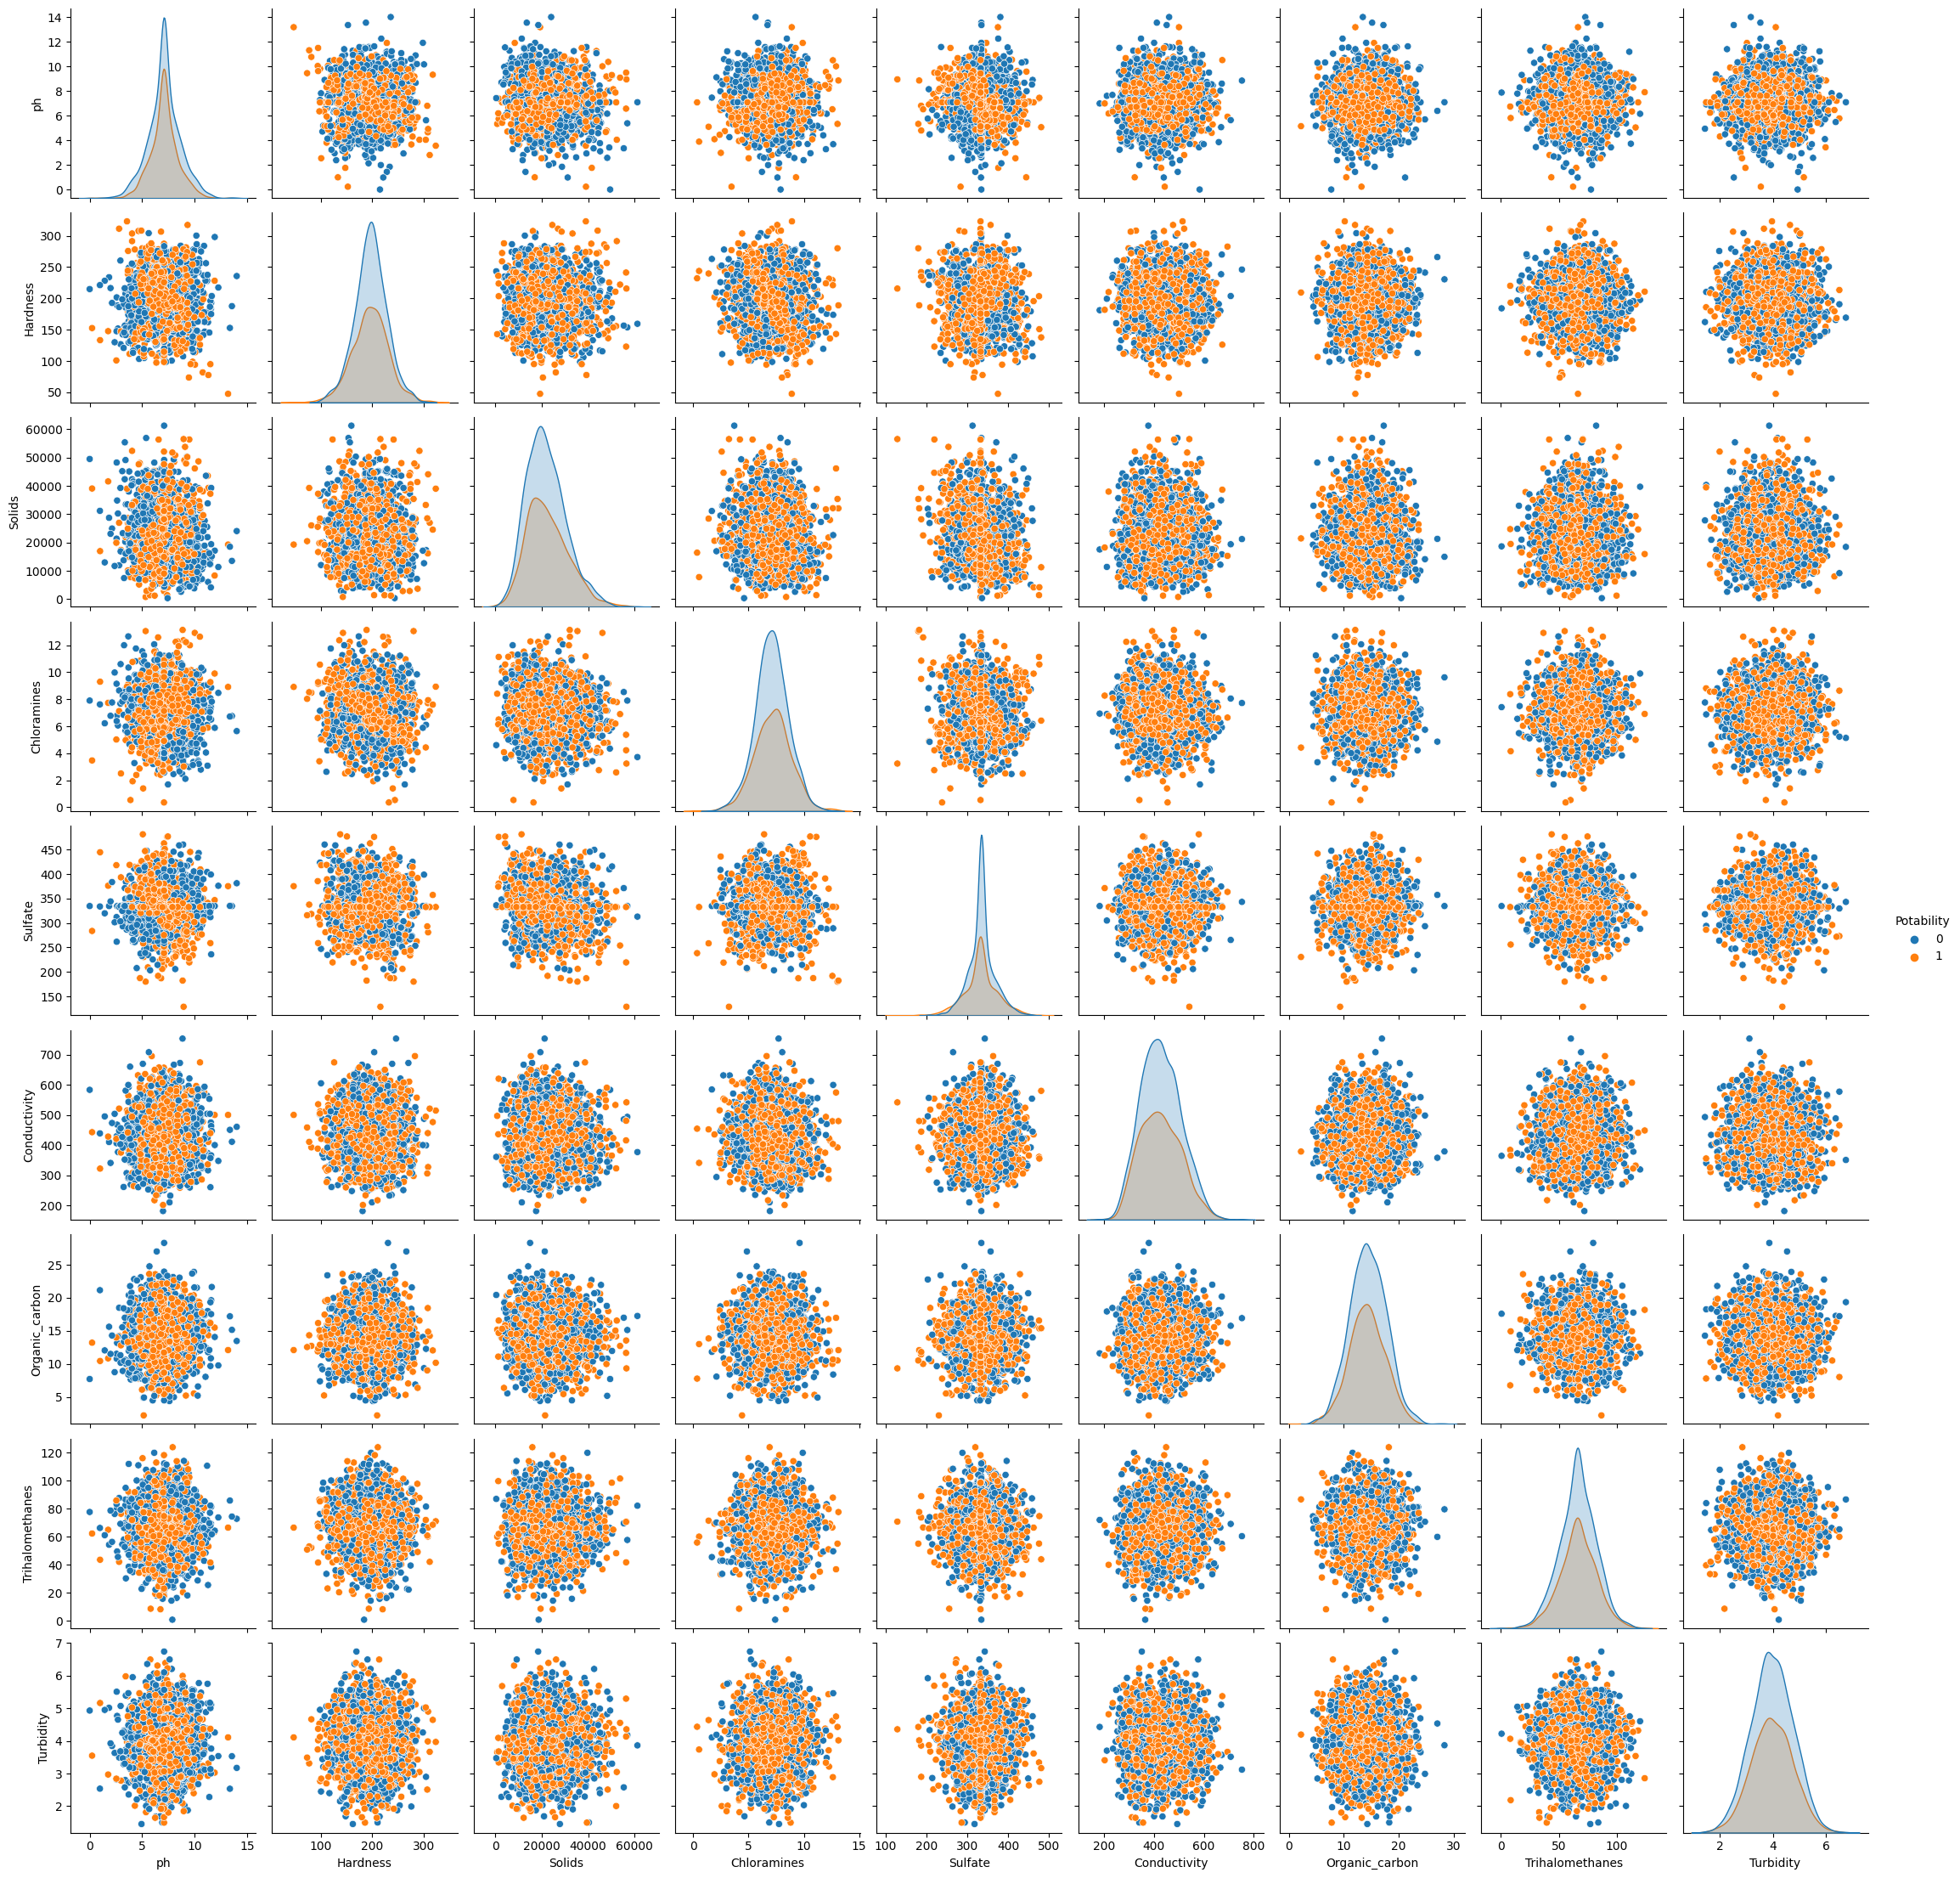

In [28]:
sns.pairplot(df, hue='Potability')

In [45]:
from sklearn.model_selection import train_test_split

# Feature and target separation
X = df.drop('Potability', axis=1)
y = df['Potability']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


<Axes: >

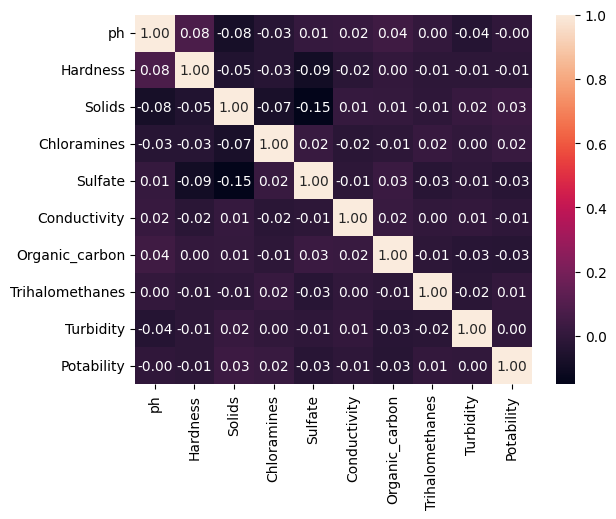

In [25]:
sns.heatmap(df.corr(), annot=True, fmt='.2f')

In [32]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV, cross_val_score
scale = StandardScaler()
X_train = scale.fit_transform(X_train)

In [33]:
models = {'Logistic Regression': LogisticRegression(),
          'K Neighbor Classifier': KNeighborsClassifier(),
          'Decision Tree': DecisionTreeClassifier(),
          'Random Forest': RandomForestClassifier(),
          'Gradient Boost': GradientBoostingClassifier(),
          'XG Boost': XGBClassifier()}
accuracy_scores = []
for name,model in models.items():
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    ac = accuracy_score(y_test, y_pred)*100
    cm = confusion_matrix(y_test, y_pred)
    ps = precision_score(y_test,y_pred)
    cr = classification_report(y_test,y_pred)

    print()
    print(name)
    print('Cross Val Scores:',cross_val_score(model,X_train,y_train,scoring='accuracy',cv=3))
    print('Accuracy Score:',ac)
    print('Confusion Matrix:\n',cm)
    print('Precision Score:',ps)
    print('Classification Report:\n',cr)
    accuracy_scores.append({'Model': name, 'Accuracy': ac})

score_df = pd.DataFrame(accuracy_scores)


Logistic Regression
Cross Val Scores: [0.60261438 0.60340314 0.60078534]
Accuracy Score: 37.33468972533062
Confusion Matrix:
 [[  1 616]
 [  0 366]]
Precision Score: 0.3727087576374745
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.00      0.00       617
           1       0.37      1.00      0.54       366

    accuracy                           0.37       983
   macro avg       0.69      0.50      0.27       983
weighted avg       0.77      0.37      0.20       983


K Neighbor Classifier
Cross Val Scores: [0.61176471 0.62827225 0.61125654]
Accuracy Score: 37.13123092573754
Confusion Matrix:
 [[  0 617]
 [  1 365]]
Precision Score: 0.37169042769857435
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       617
           1       0.37      1.00      0.54       366

    accuracy                           0.37       983
   macro avg       0.19      0.5

In [34]:
score_df

Model   Accuracy
0    Logistic Regression  37.334690
1  K Neighbor Classifier  37.131231
2          Decision Tree  62.868769
3          Random Forest  62.767040
4         Gradient Boost  62.767040
5               XG Boost  62.767040

<Axes: xlabel='Accuracy', ylabel='Model'>

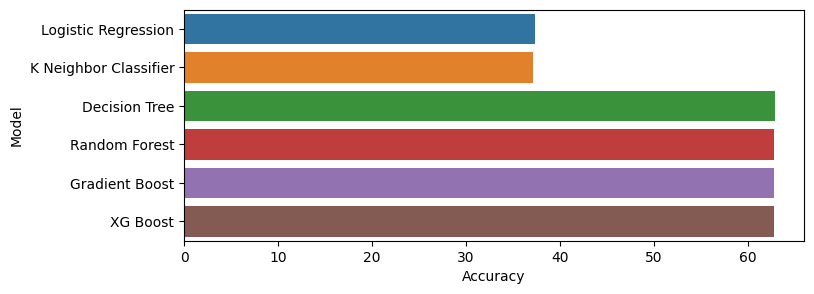

In [35]:
plt.figure(figsize=(8,3))
sns.barplot(x='Accuracy', y='Model', data=score_df)

In [38]:
import pandas as pd

# Load the dataset
dataset_path = "/kaggle/input/water-quality-prediction/water_potability.csv"
data = pd.read_csv(dataset_path)

# Display the first few rows
data.head()

ph    Hardness        Solids  Chloramines     Sulfate  Conductivity  \
0       NaN  204.890455  20791.318981     7.300212  368.516441    564.308654   
1  3.716080  129.422921  18630.057858     6.635246         NaN    592.885359   
2  8.099124  224.236259  19909.541732     9.275884         NaN    418.606213   
3  8.316766  214.373394  22018.417441     8.059332  356.886136    363.266516   
4  9.092223  181.101509  17978.986339     6.546600  310.135738    398.410813   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       10.379783        86.990970   2.963135           0  
1       15.180013        56.329076   4.500656           0  
2       16.868637        66.420093   3.055934           0  
3       18.436524       100.341674   4.628771           0  
4       11.558279        31.997993   4.075075           0